In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(cm, classes):
    """
    Confusion matrix'i görselleştirmek için kullanılan fonksiyon.
    """
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xticks(np.arange(len(classes)), classes, rotation=45)
    plt.yticks(np.arange(len(classes)), classes, rotation=45)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

In [ ]:
dataset =pd.read_csv('/content/drive/MyDrive/master-iot-data/cleaned_merged_data.csv')
data = dataset.copy()
data

**Lojistik Regresyon (Logistic Regression)**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:


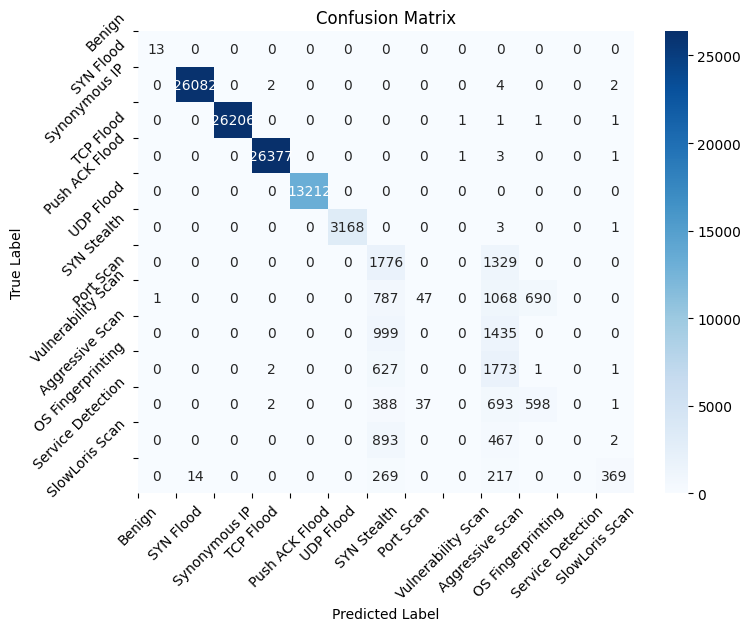


Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      1.00      1.00     26090
           2       1.00      1.00      1.00     26210
           3       1.00      1.00      1.00     26382
           4       1.00      1.00      1.00     13212
           5       1.00      1.00      1.00      3172
           6       0.31      0.57      0.40      3105
           7       0.56      0.02      0.04      2593
           8       0.00      0.00      0.00      2434
           9       0.25      0.74      0.38      2404
          10       0.46      0.35      0.40      1719
          11       0.00      0.00      0.00      1362
          12       0.98      0.42      0.59       869

    accuracy                           0.91    109565
   macro avg       0.65      0.62      0.60    109565
weighted avg       0.91      0.91      0.90    109565



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif


Accuracy: 0.909241089764067
F1 Score: 0.8990173396331905
Precision: 0.9101856064574183
Recall: 0.909241089764067

Train Time: 40.49475574493408 seconds
Test Time: 0.1229557991027832 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import time

# Veriyi özellikler ve etiketler olarak ayır
X = data.drop(columns=['Attack_Num'])  # Özellikler
y = data['Attack_Num']  # Etiketler

# Veriyi eğitim ve test kümelerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeli oluştur ve eğit
lr_model = LogisticRegression()

start_time = time.time()
lr_model.fit(X_train, y_train)
end_time = time.time()

# Test veri kümesi üzerinde tahmin yap
start_test_time = time.time()
y_pred = lr_model.predict(X_test)
end_test_time = time.time()

# Metrikleri hesapla
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
class_names = ['Benign','SYN Flood', 'Synonymous IP', 'TCP Flood', 'Push ACK Flood', 'UDP Flood', 'SYN Stealth',
          'Port Scan', 'Vulnerability Scan', 'Aggressive Scan', 'OS Fingerprinting',
          'Service Detection', 'SlowLoris Scan']
plot_confusion_matrix(cm, class_names)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Accuracy, F1 score, Precision, Recall hesapla
accuracy = (cm[0,0] + cm[1,1] + cm[2,2] + cm[3,3] + cm[4,4] + cm[5,5] + cm[6,6] + cm[7,7] + cm[8,8] + cm[9,9]
            + cm[10,10] + cm[11,11] + cm[12,12]) / np.sum(cm)
f1_score = classification_report(y_test, y_pred, output_dict=True)['weighted avg']['f1-score']
precision = classification_report(y_test, y_pred, output_dict=True)['weighted avg']['precision']
recall = classification_report(y_test, y_pred, output_dict=True)['weighted avg']['recall']

print("\nAccuracy:", accuracy)
print("F1 Score:", f1_score)
print("Precision:", precision)
print("Recall:", recall)

# Eğitim süresi, test süresi ve model boyutu
train_time = end_time - start_time
test_time = end_test_time - start_test_time
#model_size = lr_model.coef_.shape[0] * lr_model.coef_.shape[1]

print("\nTrain Time:", train_time, "seconds")
print("Test Time:", test_time, "seconds")
#print("Model Size:", model_size)